In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython import display
from utils import *

# Note
1. Last digit of the name in label data is the target label 

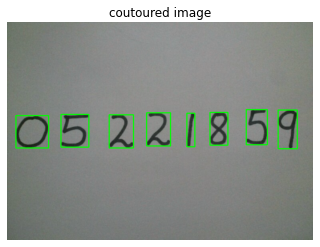

In [11]:
rel_dir = 'raw image'
filename = 'image.png'

img = cv2.imread(f'{rel_dir}/{filename}')

grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grey.copy(), (5,5), 0)
_, thresh = cv2.threshold(blur.copy(),0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours_rect = [cv2.boundingRect(c) for c in contours]

small_param = 0.001
digits = []

for x,y,w,h in sorted(contours_rect):
    
    # filter out small rect
    if w*h < small_param * img.shape[0] * img.shape[1]:
        continue
    
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0,255,0), thickness=2)
    
    digit = thresh[y:y+h, x:x+w]
    # transformation
    resized_digit = cv2.resize(digit, (18,18))
    padded_digit = np.pad(resized_digit, 5, "constant", constant_values=0)
    
    digits.append(padded_digit)

digits = np.array(digits)

plt.title('coutoured image')
plt.axis('off')
plt.imshow(img, cmap="gray")
plt.show()

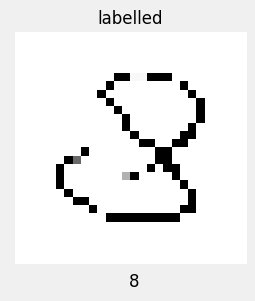

In [8]:
labels = []
del_idx = []
for i, digit in enumerate(digits):
    plt.axis('off')
    plt.imshow(digit, cmap='gray')
    plt.show()
    is_valid_inp = lambda x : x.isdigit() and int(x) >= 0 and int(x) <= 9
    
    # walrus operator returns value
    while not is_valid_inp(x := input("please enter single digit or 'x' to ignore")) and x != 'x':
        continue
    
    if is_valid_inp(x):
        labels.append(int(x))
    elif x == 'x':
        del_idx.append(i)
    
    display.clear_output(wait=True)

digits = np.delete(digits, del_idx, 0)
labels = np.array(labels)
display.clear_output()

display_digits(digits, labels, labels, 'labelled', len(labels))

In [6]:
def str_today():
    import datetime
    tmp = str(datetime.date.today())
    for s in "-:. ": tmp = tmp.replace(s, '')
    return tmp

import glob
from itertools import count
tdy_processed_img = glob.glob(f'data/{str_today()}_*.png')
counter = count(len(tdy_processed_img) + 1)

for img,lbl in zip(digits, labels):
    filename = f'{str_today()}_{next(counter)}_{lbl}.png' # png is lossless format
    cv2.imwrite('data/'+filename, img)

# # For testing purpose example
# img = cv2.imread(f'data/{str_today()}_1_0.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# (img == preprocessed_digits[0]).all() # true if identical